<a href="https://colab.research.google.com/github/Prithviraj2706/DataScience-Assignment/blob/main/SVM_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df=pd.read_csv('/content/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


EDA

In [ ]:
df.shape

(517, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
df.isnull().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [ ]:
df.duplicated().any()

True

In [ ]:
df=df.drop_duplicates()
df.duplicated().any()

False

In [ ]:
pd.crosstab(df['month'],df['size_category'])

size_category,large,small
month,,
apr,2,7
aug,43,135
dec,8,1
feb,6,14
jan,0,2
jul,9,23
jun,3,13
mar,11,42
may,1,1


In [ ]:
pd.crosstab(df['day'],df['size_category'])

size_category,large,small
day,,
fri,21,62
mon,19,55
sat,25,57
sun,27,67
thu,13,47
tue,20,43
wed,13,40


Visualisation

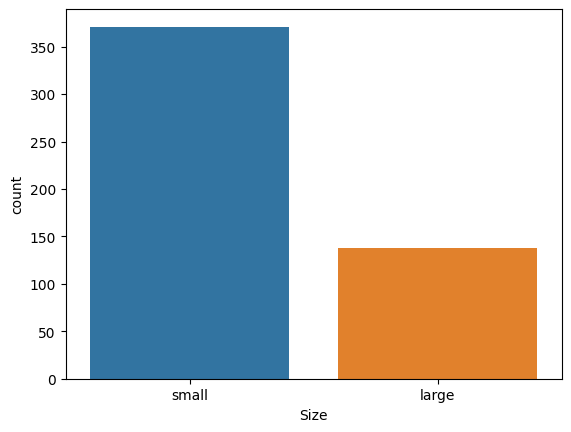

small    371
large    138
Name: size_category, dtype: int64

In [ ]:
sns.countplot(x='size_category',data= df)
plt.xlabel('Size')
plt.ylabel('count')
plt.show()
df['size_category'].value_counts()

<Axes: xlabel='month', ylabel='day'>

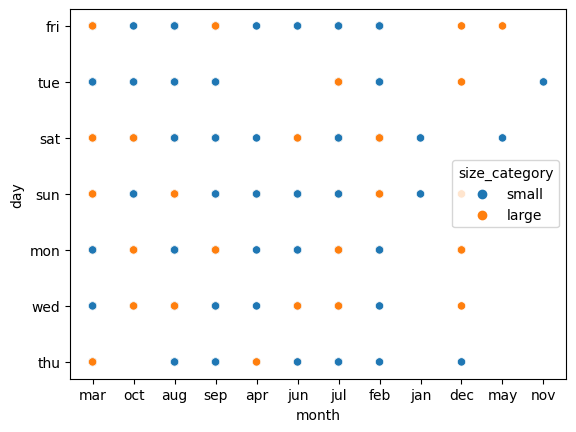

In [ ]:
sns.scatterplot(df,x=df['month'],y=df['day'],hue=df['size_category'])

<Axes: xlabel='month'>

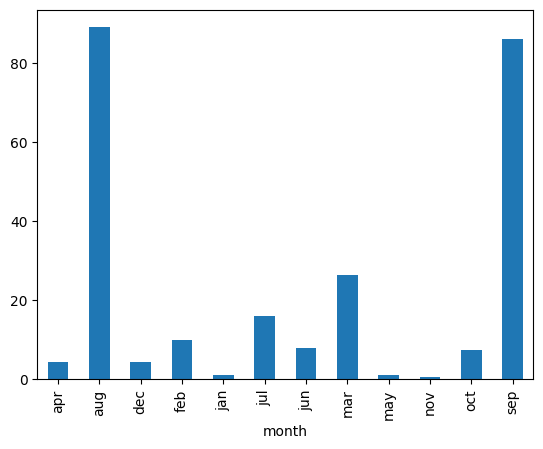

In [ ]:
pd.crosstab(df['size_category'],df['month']).mean().plot(kind='bar')

<Axes: xlabel='day'>

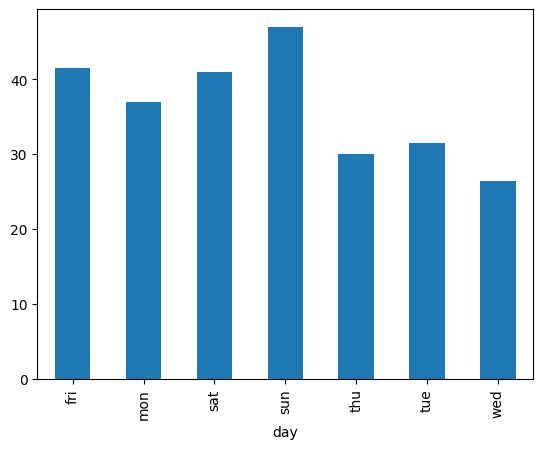

In [ ]:
pd.crosstab(df['size_category'],df['day']).mean().plot(kind='bar')

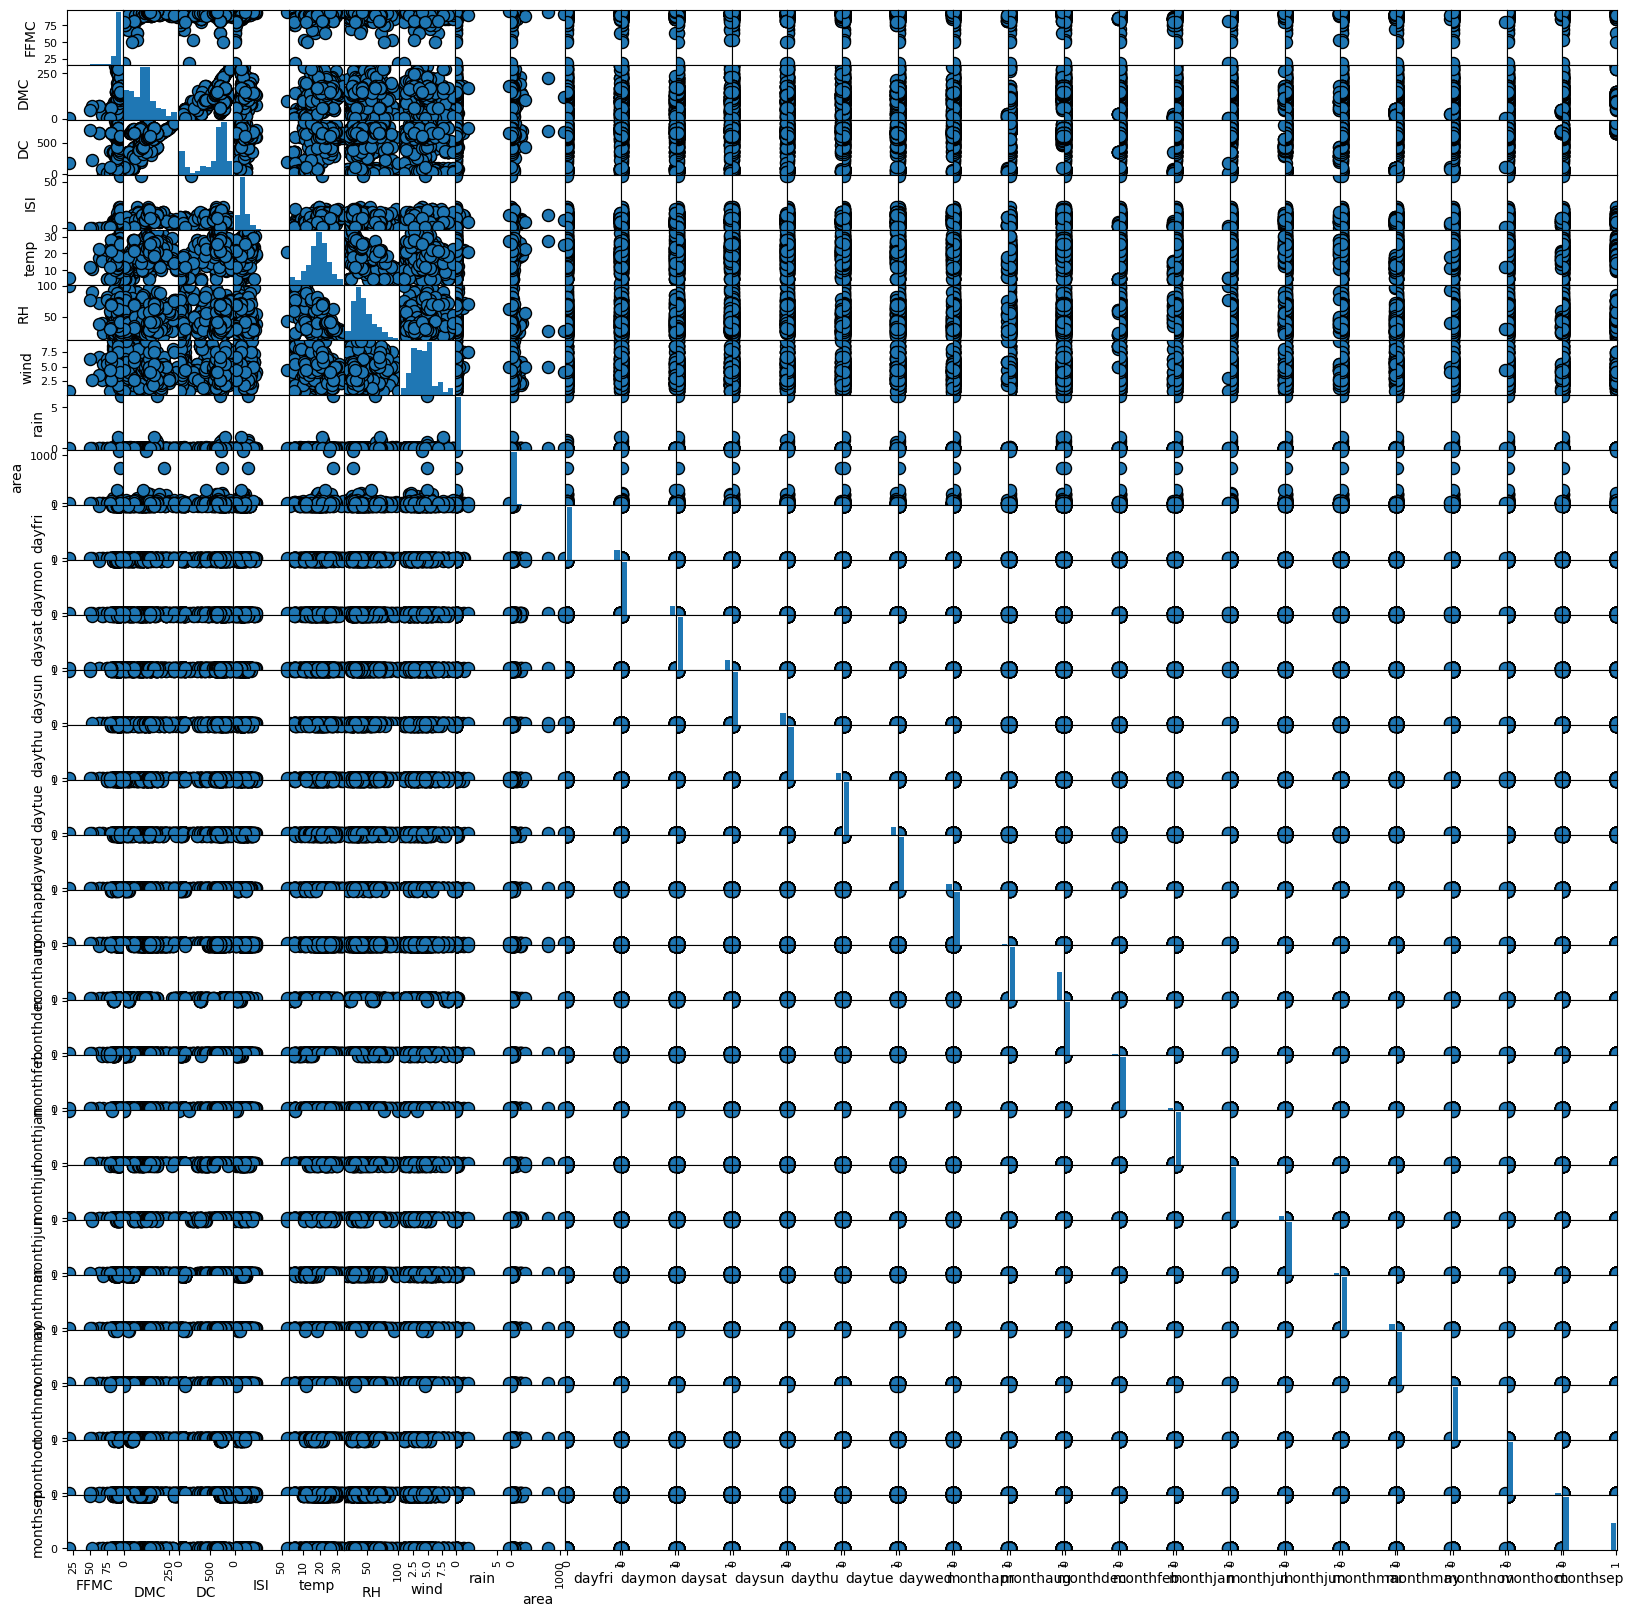

In [ ]:
# scatter matrix to observe relationship between every colomn attribute.
pd.plotting.scatter_matrix(df,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [ ]:
df['month']=df['month'].astype('category')
df['day']=df['day'].astype('category')

In [ ]:
df['month']=df['month'].cat.codes
df['day']=df['day'].cat.codes

In [ ]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
df.shape

(509, 31)

In [ ]:
x=df.iloc[:,:30]
y=df.iloc[:,30]

In [ ]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_norm=norm_func(x)

SVM Model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.23)

In [ ]:
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=40)

In [ ]:
y_pred = model_linear.predict(x_test)

In [ ]:
score=accuracy_score(y_pred,y_test)
print("Accuracy is ",np.round(score*100,2),"%")

Accuracy is  78.81 %


In [ ]:
# Kernel = rbf
model_poly = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_test_rbf = model_poly.predict(x_test)

In [ ]:
score=accuracy_score(pred_test_rbf,y_test)
print("Accuracy is ",np.round(score*100,2),"%")

Accuracy is  77.97 %


In [ ]:
# Kernel = poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [ ]:
score=accuracy_score(pred_test_poly,y_test)
print("Accuracy is ",np.round(score*100,2),"%")

Accuracy is  77.97 %


In [ ]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)
pred_test_sig = model_sig.predict(x_test)

In [ ]:
score=accuracy_score(pred_test_sig,y_test)
print("Accuracy is ",np.round(score*100,2),"%")

Accuracy is  77.97 %


SVM with GridSearchCV

In [ ]:
clf= SVC()
parm_grid = {'kernel' : ["linear","sigmoid","poly","rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}

In [ ]:
gsv = GridSearchCV(clf,parm_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0], 'gamma': [0.1],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf'],
                         'random_state': [40]})

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.7315384615384616)

In [ ]:
clf = SVC(kernel='linear',C= 1.0, gamma = 0.1,random_state=40)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 78.8135593220339


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 1, 25],
       [ 0, 92]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       large       0.04      1.00      0.07         1
       small       1.00      0.79      0.88       117

    accuracy                           0.79       118
   macro avg       0.52      0.89      0.48       118
weighted avg       0.99      0.79      0.87       118

